<a href="https://colab.research.google.com/github/Zuzed22/IA-aplicada-a-la-ciencia-de-datos/blob/main/Ejercicios_zoop_pay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Has recibido una nueva solicitud de las partes interesadas de Zoop, en la que será necesario agregar más columnas de otra base de datos a la tabla consolidada en el video anterior.

### A diferencia de las actividades que estamos realizando en los videos de este curso, aquí también utilizaremos esta nueva base para la construcción de los visuales dentro de los ejercicios de "Manos a la obra", enfocándonos en las demandas presentadas en las instrucciones de los ejercicios.

### Los archivos que vamos a utilizar en esta parte del proyecto son:

- Datos de clientes del e-commerce de Zoop, separados por el código identificador de la compra.
- Datos de ventas del e-commerce de Zoop en 2023, separados por el código identificador de la compra.
- Datos de clientes pre-registrados en Zoop Pay, la billetera digital de Zoop que está en proceso de implementación.

### Estos datos se leerán a través de enlaces (URL) que compartimos a continuación:

In [1]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

Ahora que ya sabemos cuáles son los datos necesarios para la realización del proyecto, vamos a abrir el notebook mencionado anteriormente y realizar la siguiente actividad:

Construye y ejecuta un prompt en ChatGPT solicitando que lea las tres bases de datos y cree una única tabla concatenándolas. Recuerda ser bastante específico en cuanto al orden de las columnas y cuáles serán necesarias para realizar la concatenación de los datos, además de tratar la columna de fecha para el formato adecuado.

## **Consejo 1:** Para facilitar el proceso, pide a ChatGPT que primero concatene los datos de clientes y ventas en una tabla llamada df y, finalmente, que concatene esta nueva tabla con la base de clientes pre-registrados en Zoop Pay, generando así la tabla consolidada con todos los datos. Este proceso puede realizarse paso a paso en dos prompts, por ejemplo.

In [2]:
df = ["ID_compra", "fecha", "horario", "categoria", "precio_unitario", "cantidad", "envio", "metodo_pago", "ID_cliente", "edad", "sexo_biologico", "ciudad", "estado", "region", "cashback", "nota"]

In [3]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

# URLs de los archivos CSV
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

# Cargar los datos
df_clientes = pd.read_csv(url_clientes)
df_ventas = pd.read_csv(url_ventas)

# Unir los DataFrames usando 'ID_compra' como clave
df = pd.merge(df_ventas, df_clientes, on='ID_compra', how='inner')

# Reordenar las columnas según lo solicitado
columnas_ordenadas = ["ID_compra", "fecha", "horario", "categoria", "precio_unitario", "cantidad",
                      "envio", "metodo_pago", "ID_cliente", "edad", "sexo_biologico",
                      "ciudad", "estado", "region", "cashback", "nota"]

df = df[columnas_ordenadas]

# Mostrar las primeras filas del DataFrame resultante
df.head()


,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


Ahora, vamos a la segunda parte del problema, concatenando este DataFrame creado con la base Zoop Pay y ajustando la columna de fecha a formato datetime. Por lo tanto, podemos utilizar el siguiente prompt para la resolución de estos procesos:

Ahora, vamos a unir el "df" con la base "zoop_pay", leída a partir de la URL "url_zoop_pay", generando un nuevo "df". Para unir las bases, utilizaremos la columna "ID_cliente". Además, ajustaremos la columna "fecha" al formato datetime, donde su formato en la base de datos es "YYYY-MM-DD".

In [5]:
clientes = pd.read_csv(url_clientes)

In [6]:
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [7]:
import pandas as pd

# Asegurarse de que las URLs están correctas
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

# Leer archivos correctamente
df_clientes = pd.read_csv(url_clientes)
df_ventas = pd.read_csv(url_ventas)
df_zoop_pay = pd.read_csv(url_zoop_pay)

# Unir ventas y clientes por ID_compra
df = pd.merge(df_ventas, df_clientes, on='ID_compra', how='inner')

# Reordenar columnas
columnas_ordenadas = [
    "ID_compra", "fecha", "horario", "categoria", "precio_unitario", "cantidad",
    "envio", "metodo_pago", "ID_cliente", "edad", "sexo_biologico",
    "ciudad", "estado", "region", "cashback", "nota"]

df = df[columnas_ordenadas]

# Verifica tipos antes de unir con zoop_pay
print(type(df))          # Debe ser <class 'pandas.core.frame.DataFrame'>
print(type(df_zoop_pay)) # Debe ser <class 'pandas.core.frame.DataFrame'>

# Unir con zoop_pay por ID_cliente
df = pd.merge(df, df_zoop_pay, on='ID_cliente', how='left')

# Convertir 'fecha' a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

# Ver resultado
print(df.head())


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
   ID_compra      fecha horario                    categoria  precio_unitario  \
0          6 2023-01-03   20:40                 Electrónicos           4457.9   
1          5 2023-01-03   21:48  Herramientas y construcción            115.9   
2          9 2023-01-03   17:08            Belleza e higiene             68.9   
3          4 2023-01-03   14:29  Herramientas y construcción             80.9   
4          8 2023-01-03   18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4  713.26              Paypal        6149    30      Masculino   
1         1    0.00       Transferencia        9491    36      Masculino   
2         2   13.78  Tarjeta de Crédito        5288    39       Femenino   
3         5   40.45       Transferencia        9679    35      Masculino   
4         4    0.00       Transferencia        1380    50

In [8]:
# URL de la base Zoop Pay
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

# Cargar la base Zoop Pay
df_zoop_pay = pd.read_csv(url_zoop_pay)

# Unir con zoop_pay por ID_cliente
df = pd.merge(df, df_zoop_pay, on='ID_cliente', how='left')

# Convertir 'fecha' a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

# Ver resultado
print(df.head())


   ID_compra      fecha horario                    categoria  precio_unitario  \
0          6 2023-01-03   20:40                 Electrónicos           4457.9   
1          5 2023-01-03   21:48  Herramientas y construcción            115.9   
2          9 2023-01-03   17:08            Belleza e higiene             68.9   
3          4 2023-01-03   14:29  Herramientas y construcción             80.9   
4          8 2023-01-03   18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4  713.26              Paypal        6149    30      Masculino   
1         1    0.00       Transferencia        9491    36      Masculino   
2         2   13.78  Tarjeta de Crédito        5288    39       Femenino   
3         5   40.45       Transferencia        9679    35      Masculino   
4         4    0.00       Transferencia        1380    50      Masculino   

             ciudad            estado        region cash

Aprendimos en el video anterior a construir un gráfico de columnas apiladas para la composición de datos con el apoyo del ChatGPT. ¿Qué te parece si aprendemos también otro tipo de visualización que combine la composición y comparación de datos a través de un problema?

La directiva de Zoop está preocupada por las categorías con menor facturación anual en su e-commerce y, por eso, le gustaría entender el desempeño de esas categorías de manera aislada. Para esto, recibimos la demanda de explorar la facturación trimestral investigando cómo está el equilibrio de estas ventas por cada categoría.

Para resolver este problema, vamos a agrupar las 3 categorías con las menores facturaciones anuales, separándolas por trimestre mediante un gráfico de columnas agrupadas.

¿Por qué un gráfico de columnas agrupadas?

Un gráfico de columnas agrupadas es ideal para comparar categorías diferentes en relación con una variable (puede ser temporal o no), mostrando cómo los valores se comparan dentro de cada categoría en columnas separadas, facilitando la visualización de patrones y diferencias entre grupos.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir una visualización de un gráfico de columnas agrupadas lado a lado que presente las ventas por trimestre en relación con las categorías de los productos.

En "df", tenemos las columnas:

- trimestre: con las fechas en trimestres de las compras
- faturamento: con los valores de las ventas
- categoria: con las categorías de los productos vendidos. Vamos a utilizar solo las categorías "Papelería y oficina", "Libros" y "Alimentos y bebidas".

Deseamos crear una visualización que presente las ventas por trimestre ("facturacion"), agrupando las categorías lado a lado en relación con el trimestre correspondiente a cada compra.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización."""

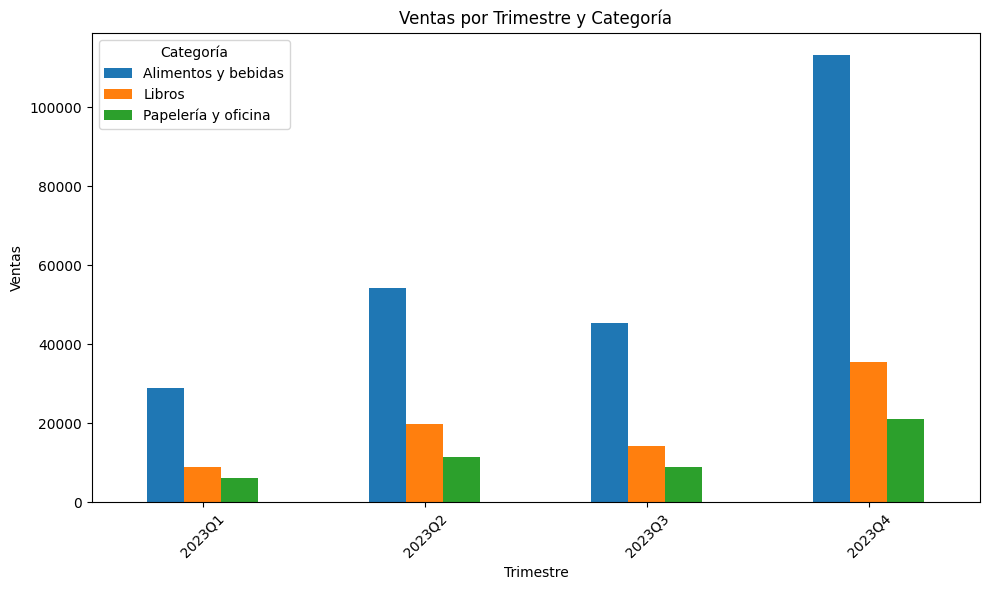

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']
df['trimestre'] = df['fecha'].dt.to_period('Q')
# Suponiendo que ya tienes el DataFrame df
# Filtrar las categorías deseadas
categorias_deseadas = ["Papelería y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df['categoria'].isin(categorias_deseadas)]
# Pivotar los datos para tener los trimestres como índice y las categorías como columnas
pivot_df = df_filtrado.pivot_table(index='trimestre', columns='categoria', values='facturacion', aggfunc='sum')
# Crear el gráfico de columnas agrupadas
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
# Agregar etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.title('Ventas por Trimestre y Categoría')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
# Mostrar el gráfico
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

## Desafío: generando visualizaciones con respecto a la localización

¿Vamos a practicar lo que aprendimos a partir del DataFrame df que generamos en el ejercicio de Manos a la Obra anterior?

Has recibido una nueva demanda de Zoop para generar 2 nuevos visuales, uno relacionado con el perfil de las ventas y el otro con el perfil de los clientes de una región específica. Vamos a observar las dos situaciones y construir, con la ayuda de ChatGPT, los dos gráficos solicitados:

### **Desafío 1:**

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre el facturación de las ventas por región. Recuerda que aquí la facturación se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de envío.

Tenemos un DataFrame llamado "df" y queremos construir una visualización de gráfico de columnas que presente la facturación por región de Zoop.
En "df", tenemos las siguientes columnas:
- region: región del/de la cliente
- precio_unitario: precio de una unidad del producto
- cantidad: cantidad vendida del producto
- envio: el valor del envío a ser pago en el total de la compra.
Deseamos crear una visualización que presente la facturación de cada región, donde la facturación se calcula multiplicando el precio unitario por la cantidad y sumando el envío.
Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

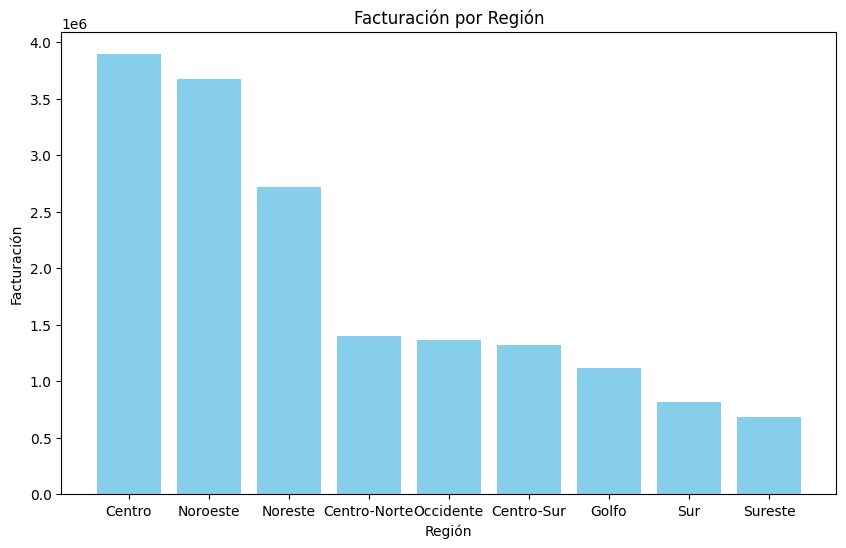

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df sea tu DataFrame
# Calcula la facturación para cada transacción
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Agrupa los datos por región y suma la facturación
facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

# Ordena el resultado para una mejor visualización
facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)

# Creación del gráfico de columnas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'], color='skyblue')  # Grafica barras
plt.title('Facturación por Región')  # Añade título al gráfico
plt.xlabel('Región')  # Añade etiqueta al eje X
plt.ylabel('Facturación')  # Añade etiqueta al eje Y
plt.show()  # Muestra el gráfico

### **Desafío 2:**

Zoop quiere realizar una campaña en los estados de México y Puebla, por lo que necesita conocer el perfil de su público según el sexo biológico. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la composición del público por sexo biológico en los estados de México y Puebla. Recuerda pedir que agrupe o apile los datos para la presentación.

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de columnas apiladas que presente la cantidad de personas por sexo biológico en relación con los estados de "México" y "Puebla".

En "df", tenemos las siguientes columnas:

- estado: estado del/de la cliente. Utilizaremos únicamente los estados de "México" y "Puebla"
- sexo_biologico: sexo biológico del/de la cliente

Deseamos crear una visualización que presente la cantidad de personas agrupadas por sexo biológico en los estados que definimos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

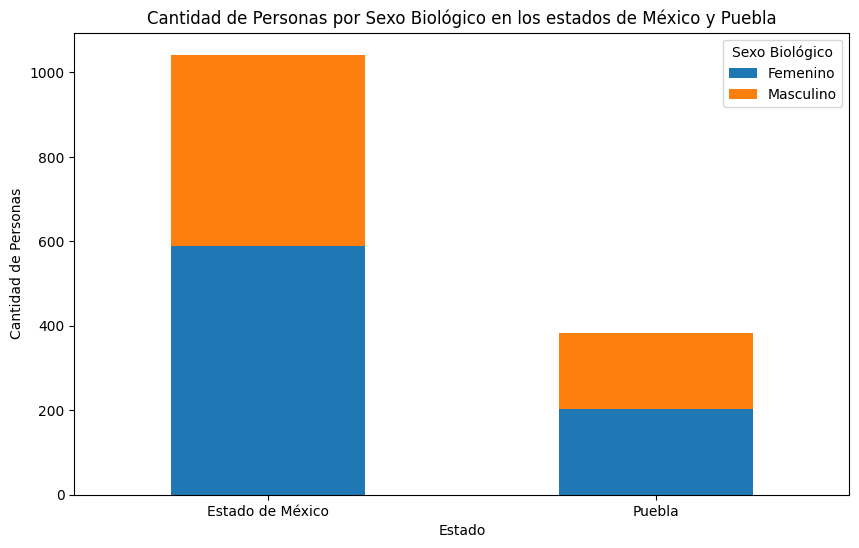

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo los estados de "México" y "Puebla"
df_filtrado = df[df['estado'].isin(['Estado de México', 'Puebla'])]

# Contar la cantidad de personas por sexo biológico y estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack(fill_value=0)

# Crear el gráfico de columnas apiladas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de Personas por Sexo Biológico en los estados de México y Puebla')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)  # Mantén las etiquetas de los estados en horizontal para mejor legibilidad

# Mostrar la leyenda y el gráfico
plt.legend(title='Sexo Biológico')
plt.show()